In [10]:
import instaloader
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')

# Initialize Instaloader
loader = instaloader.Instaloader()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Elnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Elnaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
def get_captions(account):
    captions = []
    profile = instaloader.Profile.from_username(loader.context, account)
    for post in profile.get_posts():
        if post.caption is not None:
            captions.append(post.caption)
    return captions


In [13]:
def count_words(captions):
    all_words = []
    for caption in captions:
        words = word_tokenize(caption.lower())
        all_words.extend(words)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in all_words if word.isalnum() and word not in stop_words]
    word_counts = Counter(filtered_words)
    return word_counts


In [18]:
account = 'angelinajolie'
captions = get_captions(account)
word_counts = count_words(captions)


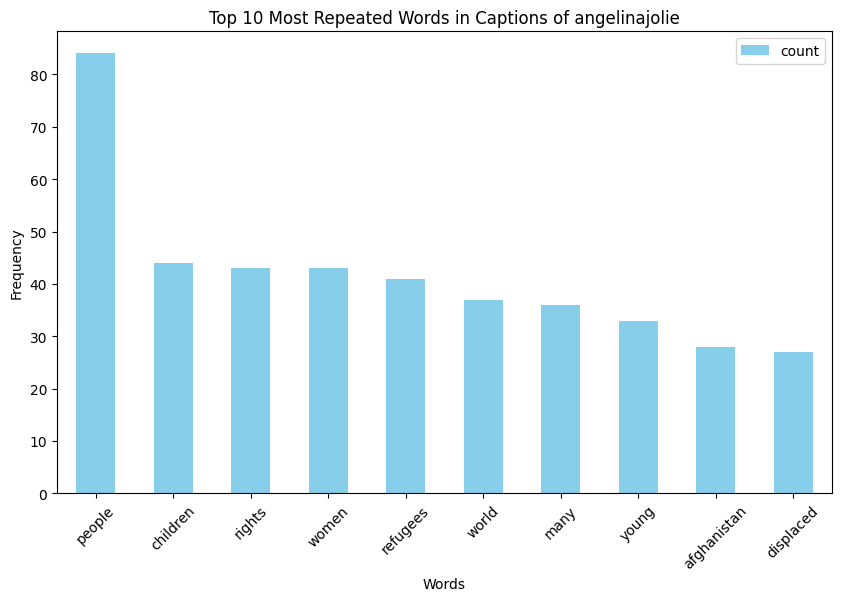

In [19]:
# Convert word counts to DataFrame
df_word_counts = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
df_word_counts.index.name = 'word'
df_word_counts.sort_values(by='count', ascending=False, inplace=True)

# Plot the top N most repeated words
top_n = 10
df_word_counts.head(top_n).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title(f'Top {top_n} Most Repeated Words in Captions of {account}')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


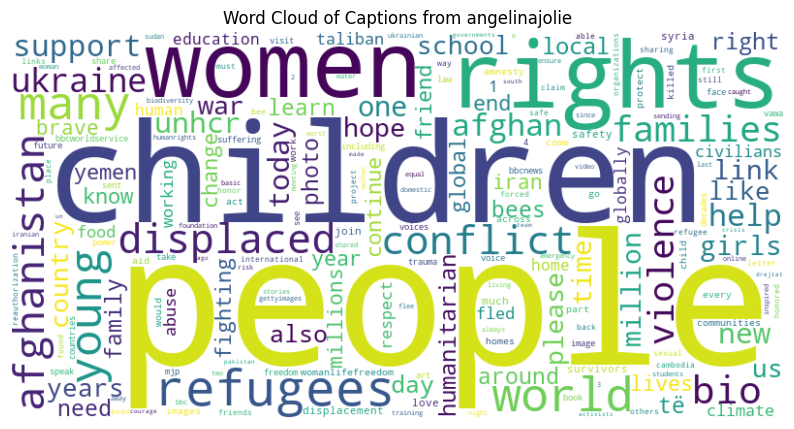

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a dictionary called word_counts with word frequencies

# Convert word counts to WordCloud format
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Word Cloud of Captions from {account}')
plt.axis('off')
plt.show()
